### General Information on Western Ghats
The Western Ghats are internationally recognized as a region of immense global importance for the conservation of biological diversity, besides containing areas of high geological, cultural and aesthetic values. A chain of mountains running parallel to India’s western coast, approximately 30-50 km inland, the Ghats traverse the States of Kerala, Tamil Nadu, Karnataka, Goa, Maharashtra and Gujarat. These mountains cover an area of around 140,000 km² in a 1,600 km long stretch that is interrupted only by the 30 km Palghat Gap


A significant characteristic of the Western Ghats is the exceptionally high level of biological diversity and endemism. This mountain chain is recognized as **one of the world’s eight ‘hottest hotspots’ of biological diversity** along with Sri Lanka. The forests of the Western Ghats include some of the best representatives of non equatorial tropical evergreen forests in the world. At least 325 globally threatened (IUCN Red Data List) species occur in the Western Ghats. The globally threatened flora and fauna in the Western Ghats are represented by 229 plant species, 31 mammal species, 15 bird species, 43 amphibian species, 5 reptile species and 1 fish species. **Of the total 325 globally threatened species in the Western Ghats, 129 are classified as Vulnerable, 145 as Endangered and 51 as Critically Endangered.** <br>
source: [UNESCO Western Ghats](https://whc.unesco.org/en/list/1342/#:~:text=A%20chain%20of%20mountains%20running,%2C%20Goa%2C%20Maharashtra%20and%20Gujarat.)

The region has a spectacular assemblage of large mammals - around **30% of the world’s Asian elephant (Elephas maximus ) population** and **17% of the world’s existing tigers (Panthera tigris)** call this area their home. Protection for these is extended through several nationally significant wildlife sanctuaries, tiger reserves, and national parks. 

***

#### My conclusion after studying climate shifts and emmision scenarios
All 4 types of emmision scenarios depict a large loss in regions of "Tropical monsoon climate" and replaced by "Tropical Savana with dry winter" and this type of climate won't be able to sustain the evergreen vegetation on which the bio-diversity of the region largely deppends. This is represented by the barplots of shift in climate. It is clearly seen that the areas of **"Tropical Monsoon Climate" have been reduced to almost half by the end of 21st centuary** and have hit the lowest of around 1.25 million sq.kms in years of 2026-2050. Especially in Maharashtra, the climate of complete western ghats region is predicted to change. This may be due very high rates of urbanization and ever increasing suburbs of Mumbai City. 

#### Necessary Imports

In [1]:
import geopandas as gpd

# for download and decompress the dataset
import os, zipfile, glob, io, requests

# for SIG and spatial info management
from shapely.geometry import Polygon, shape

# for SIG and spatial visualization
import folium
from folium import Choropleth
from folium.plugins import HeatMap

import numpy as np
import pandas as pd

# for plot and graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warning about missing/empty geometries
import warnings
warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
plt.rcParams.update({'figure.max_open_warning': 0})

# for dependencies
%matplotlib inline

### 0. Preparing the region of Western Ghats
#### 0.1 Boundaries of India


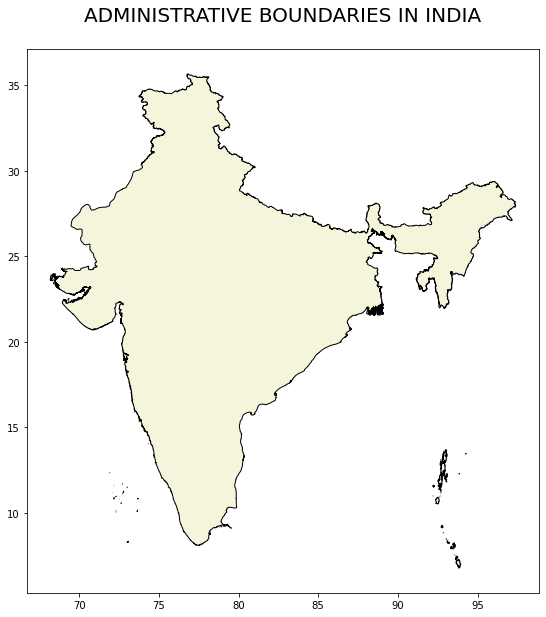

In [2]:
# India boundary dataset
boundary1 = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level2%20by%20Country/IND/IND_AL2_India.json'

# download the data with request
boundary1_req = requests.get(boundary1).content

# load the json with geopandas and set crs
boundary_df = gpd.read_file(io.StringIO(boundary1_req.decode('utf-8')))
boundary_df = boundary_df[['name', 'geometry']]

# fix the georeference! the map seems to be cliped from a bad reference
boundary_df.to_crs(5389, inplace=True)
boundary_df.to_crs(4326, inplace=True) # now is WGS84 again!

# Plotting the map
ax = boundary_df.plot(figsize=(15,10), color= 'beige', edgecolor= 'black')
ax.set_title('ADMINISTRATIVE BOUNDARIES IN INDIA\n', fontsize=20)
plt.show()

#### 0.2 Getting Biodiversity Hotspot Dataset to extract Western Ghats region

In [3]:
# Biodiversity Hotspots dataset
bioHot = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/CI_BiodiversityHotspots.geojson'

# download the data with request
bioHot_req = requests.get(bioHot).content

# load the json with geopandas
bioHot_df = gpd.read_file(io.StringIO(bioHot_req.decode('utf-8')))
bioHot_df.set_crs(epsg=4326, inplace=True)

# fixing the data: standardizing column names
bioHot_df.columns = bioHot_df.columns.str.lower()

print('The Biodiversity Hotspots dataset has %2d rows and %2d columns' %(bioHot_df.shape[0], bioHot_df.shape[1]))

The Biodiversity Hotspots dataset has 53 rows and  6 columns


#### 0.3 Preparing the Western Ghats region with in the states

In [4]:
def get_boundary_df(link):
    """
    Parameters
    ----------
    link : str
    A link to the dataset

    Returns
    -------
    GeoDataFrame
      json/geojson file's content, selects 2 columns and fixes georeference
    """
    req = requests.get(link).content
    boundary_df = gpd.read_file(io.StringIO(req.decode('utf-8')))
    boundary_df = boundary_df[['name', 'geometry']]
    boundary_df.set_crs(epsg=4326, inplace=True)
    boundary_df.to_crs(5389, inplace=True)
    boundary_df.to_crs(4326, inplace=True) 
    return boundary_df

Maharshtra

In [5]:
mh_link = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/IND/IND_AL4_Maharashtra.json'
mhBoundary_df = get_boundary_df(mh_link)

print('Maharashtra dataset has %2d rows and %2d columns' %(mhBoundary_df.shape[0], mhBoundary_df.shape[1]))

Maharashtra dataset has  1 rows and  2 columns


Karnataka

In [6]:
kn_link = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/IND/IND_AL4_Karnataka.json'
knBoundary_df = get_boundary_df(kn_link)

print('Karnataka dataset has %2d rows and %2d columns' %(knBoundary_df.shape[0], knBoundary_df.shape[1]))

Karnataka dataset has  1 rows and  2 columns


Gujarat

In [7]:
gj_link = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/IND/IND_AL4_Gujarat.json'
gjBoundary_df = get_boundary_df(gj_link)

print('Gujarat dataset has %2d rows and %2d columns' %(gjBoundary_df.shape[0], gjBoundary_df.shape[1]))

Gujarat dataset has  1 rows and  2 columns


Kerela

In [8]:
kl_link = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/IND/IND_AL4_Kerala.json'
klBoundary_df = get_boundary_df(kl_link)

print('Kerela dataset has %2d rows and %2d columns' %(klBoundary_df.shape[0], klBoundary_df.shape[1]))

Kerela dataset has  1 rows and  2 columns


Goa

In [9]:
go_link = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/IND/IND_AL4_Goa.json'
goBoundary_df = get_boundary_df(go_link)

print('Goa dataset has %2d rows and %2d columns' %(goBoundary_df.shape[0], goBoundary_df.shape[1]))

Goa dataset has  1 rows and  2 columns


Tamil Nadu

In [10]:
tn_link = 'https://datasets.mojaglobal.workers.dev/0:/Administrative/Boundaries/Level4%20by%20State/IND/IND_AL4_Tamil%20Nadu.json'
tnBoundary_df = get_boundary_df(tn_link)

print('Tamil Nadu dataset has %2d rows and %2d columns' %(tnBoundary_df.shape[0], tnBoundary_df.shape[1]))

Tamil Nadu dataset has  1 rows and  2 columns


In [11]:
# concatenating the dataframes to form one region
region_df = pd.concat([mhBoundary_df, knBoundary_df, gjBoundary_df, 
                       klBoundary_df, goBoundary_df, tnBoundary_df], ignore_index=True)

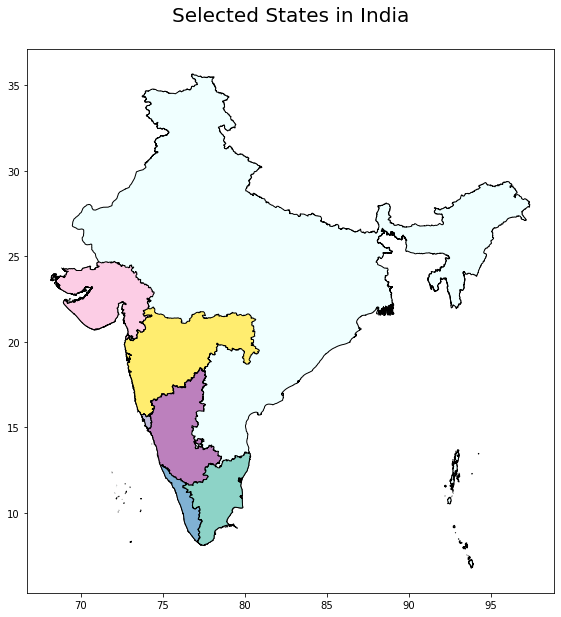

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

ax.set_title('Selected States in India\n', fontsize=20)
boundary_df.plot(ax=ax, color='azure', edgecolor='black')
region_df.plot(ax=ax, cmap='Set3_r', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower left'})

plt.show()

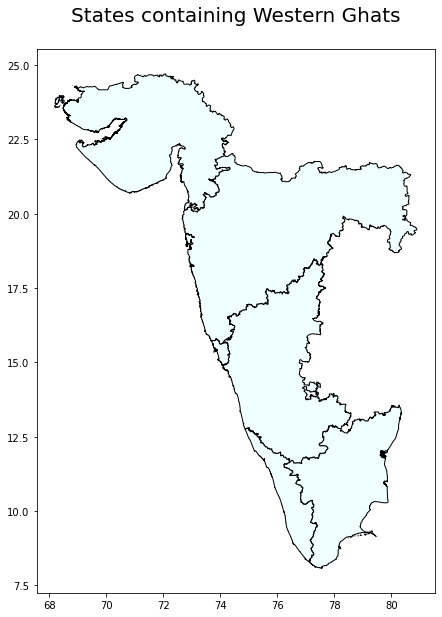

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('States containing Western Ghats\n', fontsize=20)
region_df.plot(ax=ax, color='azure', edgecolor='black')

plt.show()

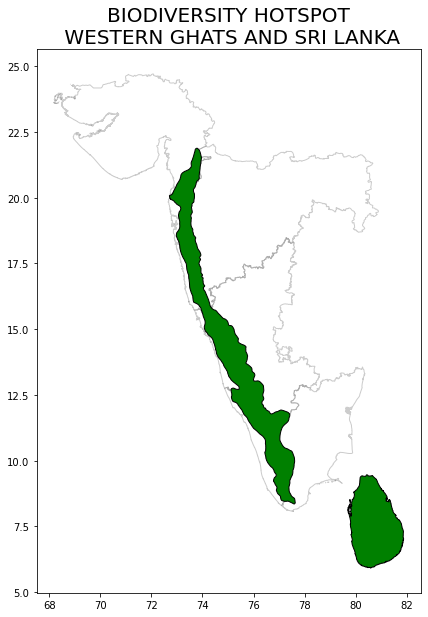

In [14]:
forest_boundary_df = bioHot_df[bioHot_df['name'] == 'Western Ghats and Sri Lanka']

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
region_df.plot(ax=ax, color='none', edgecolor='grey',  alpha=0.4)
ax.set_title('BIODIVERSITY HOTSPOT\n WESTERN GHATS AND SRI LANKA', fontsize=20)

forest_boundary_df.plot(ax=ax, color='green', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower left'})

plt.show()

### 1. Western Ghats on Map

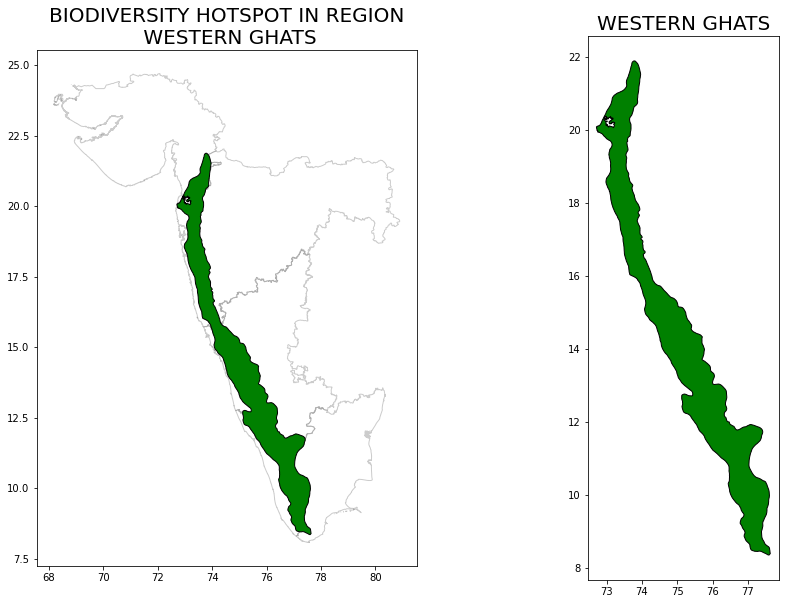

In [15]:
forest_boundary_df = forest_boundary_df.clip(region_df)

fig, ax = plt.subplots(1,2, figsize=(15, 10))
ax[0].set_title('BIODIVERSITY HOTSPOT IN REGION\n WESTERN GHATS', fontsize=20)
region_df.plot(ax=ax[0], color='none', edgecolor='grey',  alpha=0.4)
forest_boundary_df.plot(ax=ax[0], color='green', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower left'})

ax[1].set_title('WESTERN GHATS', fontsize=20)
forest_boundary_df.plot(ax=ax[1], color='green', edgecolor='black',
                    legend=True, legend_kwds={'loc': 'lower left'})

plt.show()

### 2. Soil Resources

In [16]:
# India Soil resources
indiaSoil1 = 'https://datasets.mojaglobal.workers.dev/0:/Soil/World%20Soil%20Resources/byCountry/IND_AL2_India_WSR.json'

# download the data with request
indiaSoil1_req = requests.get(indiaSoil1).content

# load the json with geopandas
indiaSoil_df = gpd.read_file(io.StringIO(indiaSoil1_req.decode('utf-8')))

# fix the georeference the map seems to be cliped from a bad reference
indiaSoil_df.to_crs(5389, inplace=True)
indiaSoil_df.to_crs(4326, inplace=True) # now is WGS84

# fixing the data
# standardizing column names
indiaSoil_df.columns = indiaSoil_df.columns.str.lower()

# drop useless columns
indiaSoil_df = indiaSoil_df[['sname', 'ipcc', 'geometry']]

print('Indian Soil resources dataset has %2d rows and %2d columns' %(indiaSoil_df.shape[0], indiaSoil_df.shape[1]))

Indian Soil resources dataset has 12 rows and  3 columns


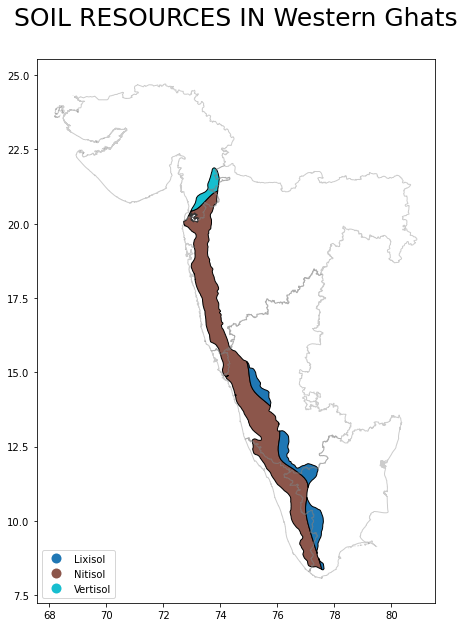

In [17]:
forest_soil_df = indiaSoil_df.clip(forest_boundary_df)

ax = forest_soil_df.plot(figsize = (20,10), column = 'ipcc',
                  edgecolor='black', cmap='tab10', legend= True, 
                  legend_kwds= {'loc': 'lower left'})
region_df.plot(ax=ax, color='none', edgecolor='grey',  alpha=0.4)
ax.set_title('SOIL RESOURCES IN Western Ghats\n', fontsize=25)
plt.show()

Almost the entire region has Nitisol soil which a deep, red, well-drained soil with a clay content of more than 30% and a blocky structure.

### 3. Terrestrial Ecoregions

In [18]:
ecoRegions = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/TerrestrialEcoregionsoftheWorld_WWF.geojson'

# download the data with request
ecoRegions_req = requests.get(ecoRegions).content

# load the json with geopandas
ecoRegions_df = gpd.read_file(io.StringIO(ecoRegions_req.decode('utf-8')))
ecoRegions_df.set_crs(epsg=4326, inplace=True)

# fixing the data: standardizing column names
ecoRegions_df.columns = ecoRegions_df.columns.str.lower()

print('The Terrestrial Ecoregions dataset has %2d rows and %2d columns' %(ecoRegions_df.shape[0], ecoRegions_df.shape[1]))

The Terrestrial Ecoregions dataset has 14351 rows and 22 columns


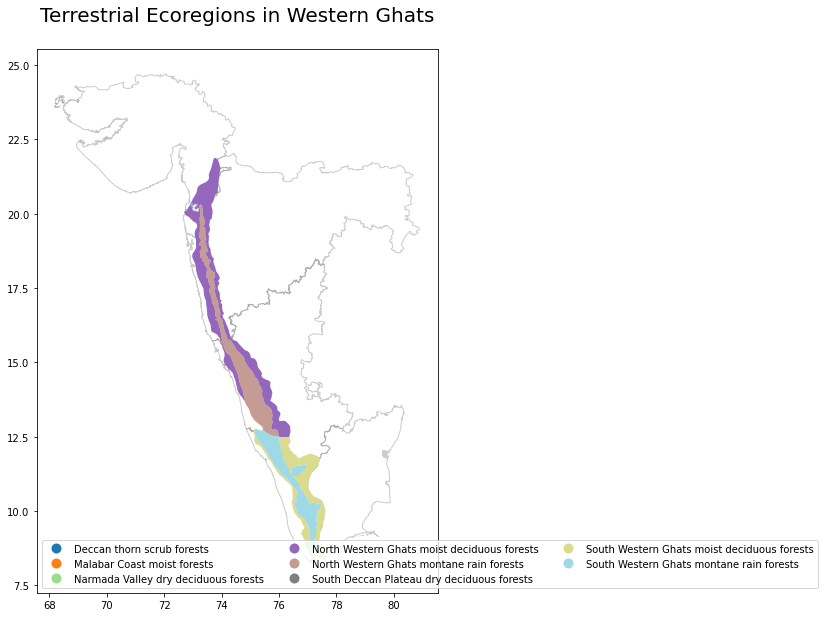

In [19]:
forest_ecoRegions_df = ecoRegions_df.clip(forest_boundary_df)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
region_df.plot(ax=ax, color='none', edgecolor='grey',  alpha=0.4)
forest_ecoRegions_df.plot(ax =ax, column= 'eco_name', cmap= 'tab20', legend= True, 
                  legend_kwds={'loc': 'lower left', 'ncol': 3})
ax.set_title('Terrestrial Ecoregions in Western Ghats\n', fontsize=20)
plt.show()

##### Major Terrestrial Ecoregions in Western Ghats are -
*  North Western Ghats Montane Rain Forests
*  North Western Ghats Moist Decidous Forests
*  South Western Ghats Montane Rain Forests
*  South Western Ghats Moist Decidous Forests

### 4. Holdridge Life Zones

In [20]:
holdrigde = 'https://datasets.mojaglobal.workers.dev/0:/Bioclimatic&EcologicalZones/HoldridgeLifeZones.json'

# download the data with request
holdrigde_req = requests.get(holdrigde).content

# load the json with geopandas and set crs
holdrigde_df = gpd.read_file(io.StringIO(holdrigde_req.decode('utf-8')))
holdrigde_df.set_crs(epsg=4326, inplace=True)

# fixing the data
# standardizing column names
holdrigde_df.columns = holdrigde_df.columns.str.lower()

# removing useles columns or empty labels
holdrigde_df = holdrigde_df.loc[holdrigde_df.desc != ' '] # remove oceans
holdrigde_df = holdrigde_df[['desc', 'geometry','frequency', 'area', 'perimeter']]

print('Holdridge Life Zones dataset has %2d rows and %2d columns.' %(holdrigde_df.shape[0], holdrigde_df.shape[1]))

Holdridge Life Zones dataset has 4710 rows and  5 columns.


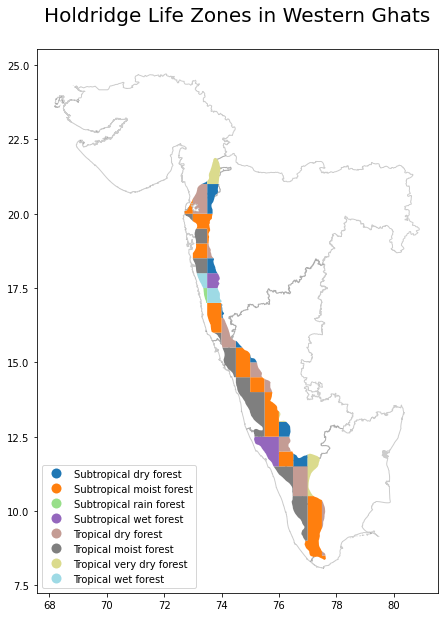

In [21]:
forest_holdrigde_df = holdrigde_df.clip(forest_boundary_df)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
region_df.plot(ax=ax, color='none', edgecolor='grey',  alpha=0.4)
forest_holdrigde_df.plot(ax =ax, column='desc', cmap= 'tab20', legend= True, 
                  legend_kwds={'loc': 'lower left', 'ncol': 1})
ax.set_title('Holdridge Life Zones in Western Ghats\n', fontsize=20)
plt.show()

### 5. Climatic Zones

In [22]:
# Climate Zones dataset
climate = 'https://datasets.mojaglobal.workers.dev/0:/Climate/IPCC_ClimateZoneMap_Vector.geojson'

# download the data with request
climate_req = requests.get(climate).content

# load the json with geopandas
climate_df = gpd.read_file(io.StringIO(climate_req.decode('utf-8')))
climate_df.set_crs(epsg=4326, inplace=True)

# standardizing column names
climate_df.columns = climate_df.columns.str.lower()

print('World Climate Zones dataset has %2d rows and %2d columns.' %(climate_df.shape[0], climate_df.shape[1]))

World Climate Zones dataset has 26165 rows and  2 columns.


In [23]:
# Replacing the data that was in codes
classification =  {'1': 'Tropical montane', '2' : 'Tropical wet', 
                   '3': 'Tropical moist', '4': 'Tropical dry', 
                   '5': 'Warm temperate moist', '6': 'Warm temperate dry',
                   '7': 'Cool temperate moist', '8': 'Cool temperate dry',
                   '9': 'Boreal moist', '10': 'Boreal dry', '11' : 'Polar moist',
                   '12': 'Polar dry'}


# renaming class_name
climate_df.class_name = climate_df.class_name.astype('str').replace(classification)

# removing oceans
climate_df =  climate_df.loc[climate_df.class_name != '0']

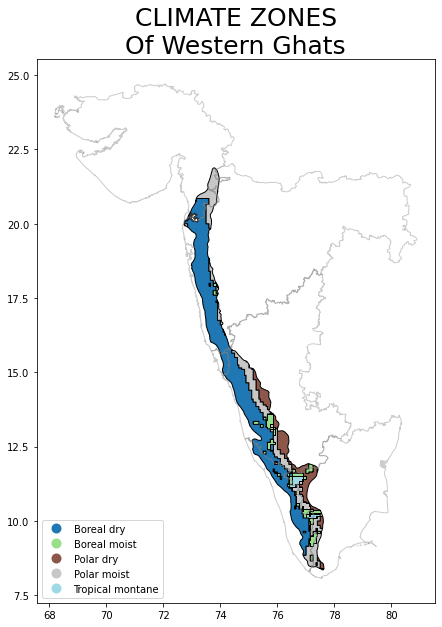

In [24]:
forest_climate_df = climate_df.clip(forest_boundary_df)

ax = forest_climate_df.plot(figsize=(10,10), edgecolor='black', column = 'class_name', cmap='tab20',
                                    legend= True, legend_kwds={'loc': 'lower left'})
region_df.plot(ax=ax, color='none', edgecolor='grey',  alpha=0.4)
ax.set_title('CLIMATE ZONES\nOf Western Ghats', fontsize=25)
plt.show()

## 6. Koppen-Geiger Climate Changes (1901 - 2100)
**This system is based on the idea that climate is best defined by native vegetation.**

In [25]:
# Load the data and prepare the datasets
with zipfile.ZipFile('KoppenGeigerClimateShifts.zip', 'r') as shifts:
  shifts.extractall("shifts")

# path to the folder
files = glob.glob(os.path.join('C:/Users/shubh/shifts', '*geojson'))

In [26]:
# Rename and arrange the information
# prepare names
names = [i[22:31]+ '_' + i[32:34] for i in files]  

# prepare the files
files_loaded = [gpd.read_file(f) for f in files]

# merging all the metadata
koppen = list(zip(names, files_loaded))

# print the results
print('%2d dataset were imported for shift in climate Zones.' %(len(koppen)))

20 dataset were imported for shift in climate Zones.


In [27]:
# fixing the data, adding abbreviations and koppen-geiger terms

# the Koppen-Geiger system
koppen_abb = {'11': 'Af', '12': 'Am', '13': 'As', '14': 'Aw', '21': 'BWk', 
              '22': 'BWh', '26': 'BSk', '27': 'BSh', '31': 'Cfa', 
              '32': 'Cfb', '33': 'Cfc', '34': 'Csa', '35': 'Csb', 
              '36': 'Csc', '37': 'Cwa', '38': 'Cwb', '39': 'Cwc', 
              '41': 'Dfa', '42': 'Dfb', '43': 'Dfc', '44': 'Dfd', 
              '45': 'Dsa', '46': 'Dsb', '47': 'Dsc', '48': 'Dsd', 
              '49': 'Dwa', '50': 'Dwb', '51': 'Dwc', '52': 'Dwd', 
              '61': 'EF', '62': 'ET', '0': 'NaN'}

koppen_term ={'Af' : 'Tropical rainforest climate', 'Am' : 'Tropical monsoon climate', 
              'As' : 'Tropical savanna climate with dry-summer characteristics', 
              'Aw' : 'Tropical savanna climate with dry-winter characteristics', 
              'BWk' : 'Cold desert climate', 'BWh' : 'Hot desert climate', 
              'BSk' : 'Cold semi-arid climate', 'BSh' : 'Hot semi-arid climate', 
              'Cfa' : 'Humid subtropical climate;', 'Cfb' : 'Temperate oceanic climate', 
              'Cfc' : 'Subpolar oceanic climate', 'Csa' : 'Hot-summer Mediterranean climate', 
              'Csb' : 'Warm-summer Mediterranean climate', 'Csc' : 'Cold-summer Mediterranean climate', 
              'Cwa' : 'Monsoon-influenced humid subtropical climate', 'Cwb' : 'Subtropical highland climate', 
              'Cwc' : 'Cold subtropical highland climate', 'Dfa' : 'Hot-summer humid continental climate', 
              'Dfb' : 'Warm-summer humid continental climate', 'Dfc' : 'Subarctic climate', 
              'Dfd' : 'Extremely cold subarctic climate', 'Dsa' : 'Mediterranean-influenced hot-summer humid continental climate', 
              'Dsb' : 'Mediterranean-influenced warm-summer humid continental climate', 
              'Dsc' : 'Mediterranean-influenced subarctic climate', 'Dsd' : 'Mediterranean-influenced extremely cold subarctic climate', 
              'Dwa' : 'Monsoon-influenced hot-summer humid continental climate', 'Dwb' : 'Monsoon-influenced warm-summer humid continental climate', 
              'Dwc' : 'Monsoon-influenced subarctic climate', 'Dwd' : 'Monsoon-influenced extremely cold subarctic climate', 
              'EF' : 'Ice cap climate', 'ET' : 'Tundra climate'}

# replacing in all the dataframes
for i in koppen:
    name, df = i
    # fixing df, lower columns
    df.columns = df.columns.str.lower()
    # mapping abbreviations
    df['gridcode'] = df['gridcode'].fillna(0) # handle empty
    df['gridcode'] = df['gridcode'].astype(int) # coercing for replace
    df['abb'] = df.gridcode.astype(str).replace(koppen_abb)
    # mappin name
    df['koppen'] = df.abb.replace(koppen_term)
    # selecting columns
    df = df[['abb', 'koppen', 'geometry', 'shape_length', 'shape_area']]

In [28]:
# Plotting function - for regions
def plot_shift_forest(df_list,legend_loc):
    font = {'family': 'serif',
          'color':  'darkred',
          'weight': 'normal',
          'size': 30,
          }

    fig, axs = plt.subplots(2,2, figsize=(20, 20), facecolor='w', edgecolor='k')

    for ax, i in zip(axs.ravel(),df_list) :
        name, df = i
        #name correction
        if '_' in name:
            name = name.replace('_', ' in ')

        df.set_crs(epsg=4326, inplace=True)
        df.plot(ax = ax, column='koppen', cmap='tab20c',
            legend=True, legend_kwds= {'loc': legend_loc})
        region_df.plot(ax=ax, color='none', edgecolor='grey',  alpha=0.4)
        ax.set_title(str(name), fontdict=font)
    plt.tight_layout()
    plt.show()

**6.1 Shifts bases on observations** (1901 - 2000):
- `observations_world` - **World - Shifts bases on observations** 
- `observations_region` - **Forest Region of Western Ghats - Shifts based on observations.**

In [29]:
# creating a new list for observations geojson (no other code than years)
observations_world = []
for i in koppen:
    name, df = i
    #display(name)
    if name[-2:] == 'ge':
        observations_world.append((name[:-3], df))

    # sorting the list by year
observations_world = sorted(observations_world, key = lambda x: int(x[0][0:3]))

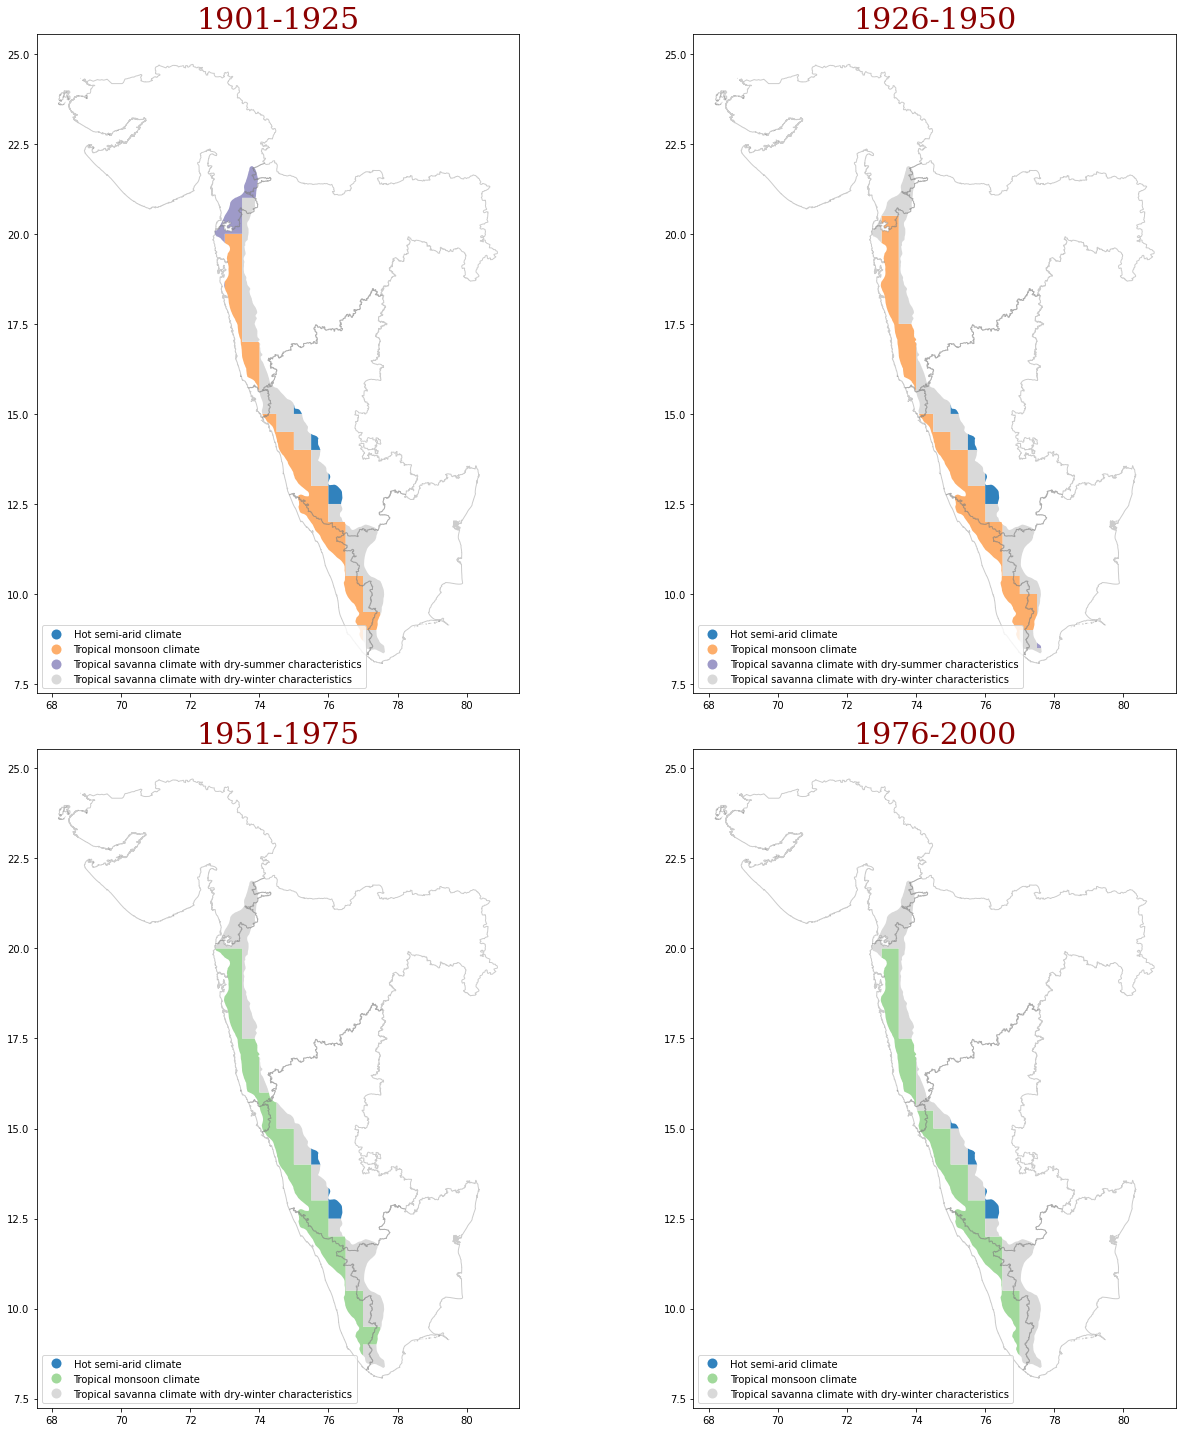

In [30]:
# creating a new list for observations for forest reion
observations_region = []
for i in observations_world:
  name, df = i
  temp = df.clip(forest_boundary_df)
  temp = temp.reset_index(drop=True)
  observations_region.append((name, temp))

# plotting variations in observations
plot_shift_forest(observations_region, 'lower left')

For the last centuary the "Tropical Monsoon Climate" and "Tropical Savanna Climate with Dry winter" have dominated the region of Western Ghats.
***

 **6.2 A1FI Emision Scenarios**, based on: 
  > Rapid economic growth, low population growth and rapid introduction of new and more efficient technology.

* `a1f1_world` - **World - Shifts based A1F1 Emision Scenarios**
* `a1f1_region` - **Forest Region of Western Ghats - Shifts based A1F1 Emision Scenarios**

In [31]:
# creating a new list for a1f1
a1f1_world = []
for i in koppen:
  name, df = i
  if name[-2:] == 'A1':
    a1f1_world.append((name +'F1', df))

# sorting the list by year
a1f1_world = sorted(a1f1_world, key = lambda x: int(x[0][0:3]))

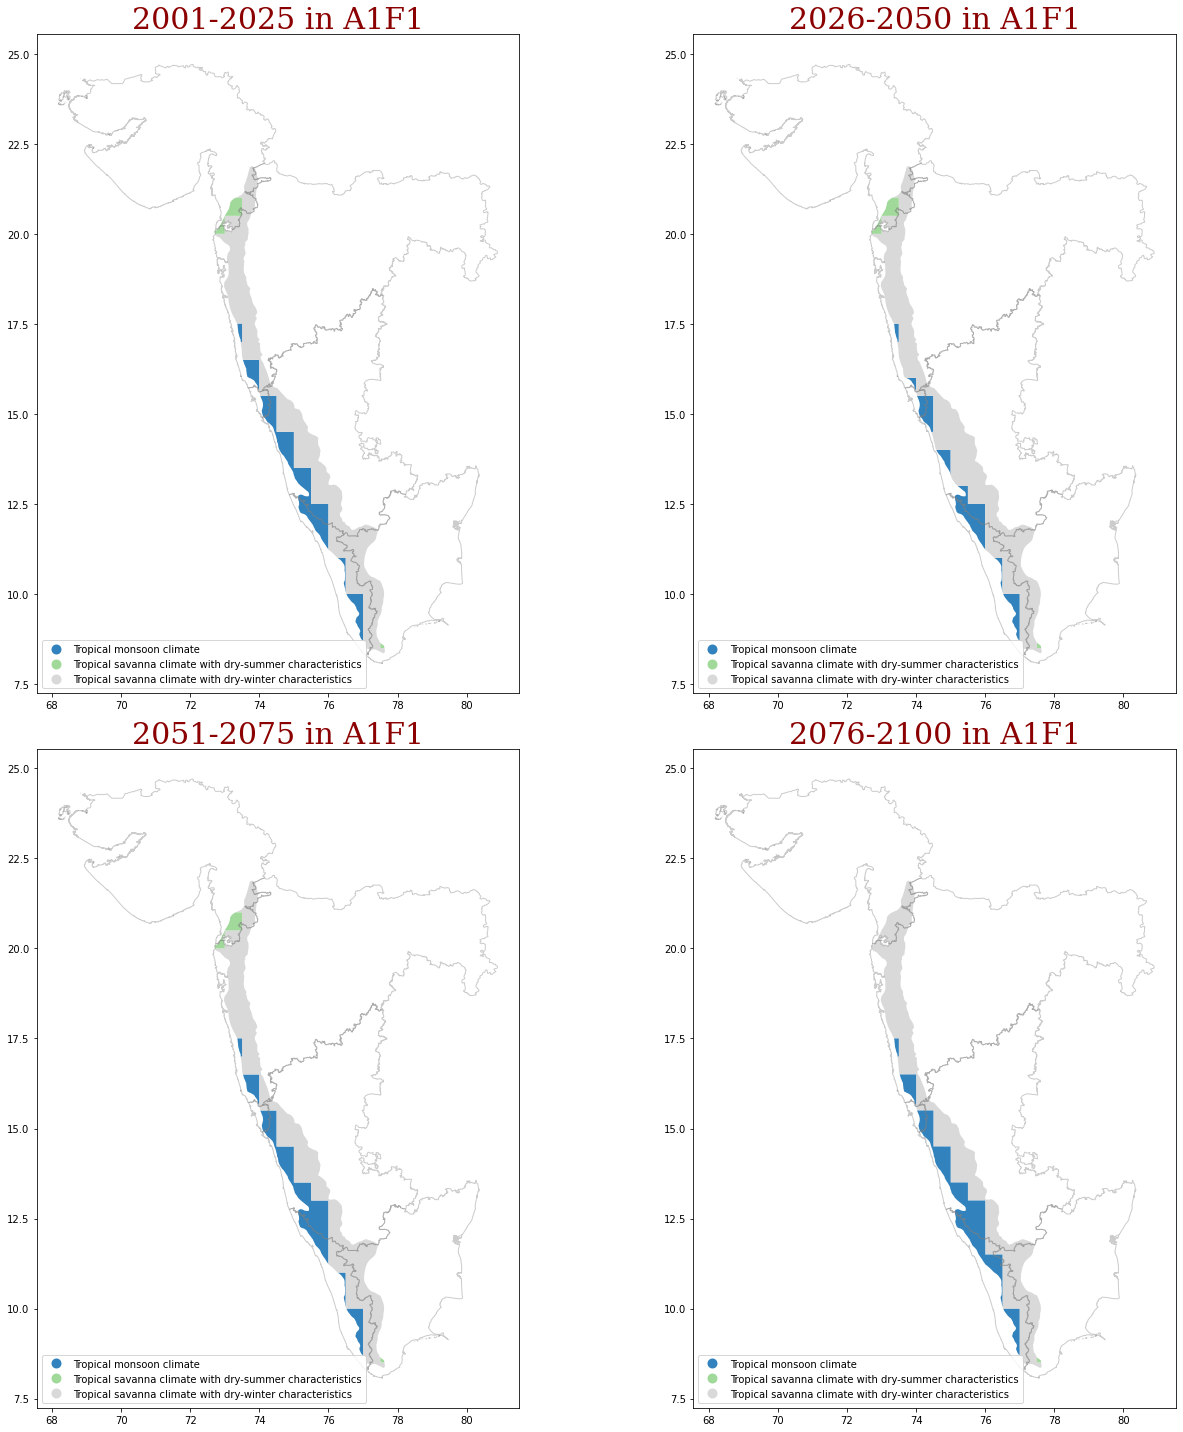

In [32]:
a1f1_region = []
for i in a1f1_world:
  name, df = i
  temp = df.clip(forest_boundary_df)
  temp = temp.reset_index(drop=True)
  a1f1_region.append((name, temp))

plot_shift_forest(a1f1_region, 'lower left')

**6.3 A2 Emision Scenario**, based on:
> A very heterogeneous world, high population growth, and less concern for rapid economic development.

 * `a2_world` - **World - Shifts based A2 Emision Scenarios**
 * `a2_region` - **Region (Madre de Dios and Cusco) - Shifts based A2 Emision Scenarios**

In [33]:
# creating a new list for a2
a2_world = []
for i in koppen:
  name, df = i
  if name[-2:] == 'A2':
    a2_world.append((name, df))

# sorting the list by year
a2_world = sorted(a2_world, key = lambda x: int(x[0][0:3]))

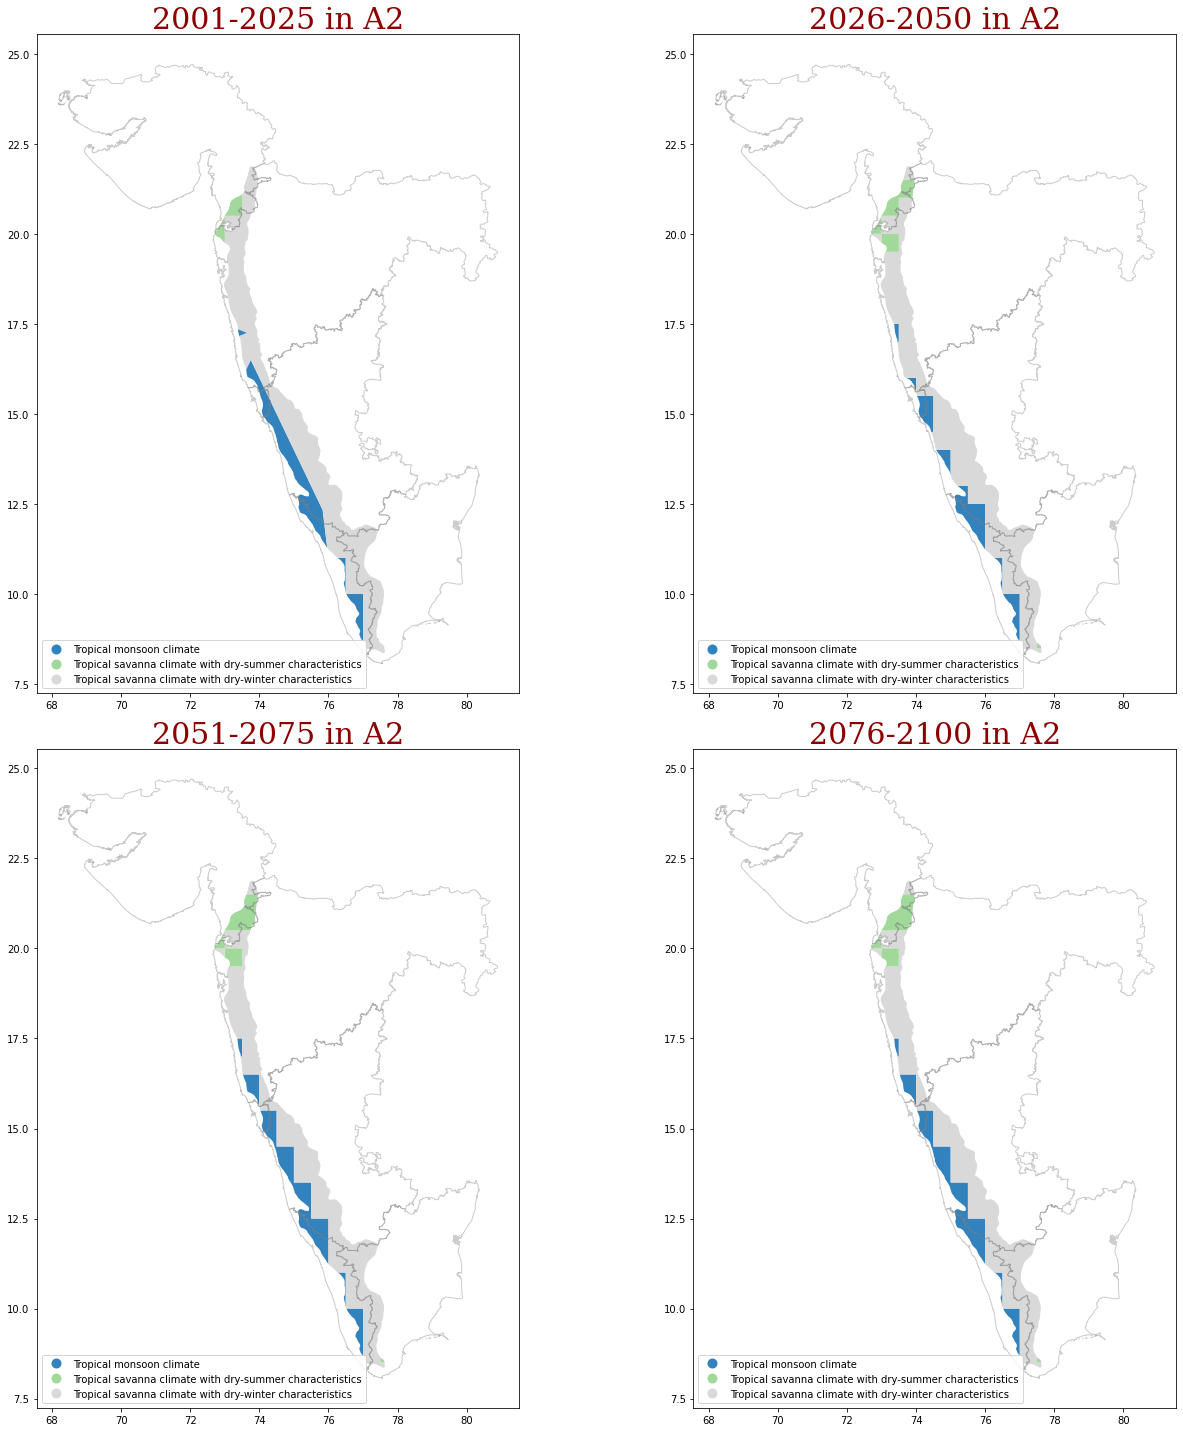

In [34]:
a2_region = []
for i in a2_world:
  name, df = i
  temp = df.clip(forest_boundary_df)
  temp = temp.reset_index(drop=True)
  a2_region.append((name, temp))

plot_shift_forest(a2_region, 'lower left')

**6.4 B1 Emision Scenario**, based on:
  > A convergent world but with rapid changes in economic structures toward a service and information economy, with reductions in materials intensity, and the introduction of clean and resource-efficient technologies.
  
* `b1_world` - **World - Shifts based B1 Emision Scenarios**
* `b1_region` - **Forest Region of Western Ghats- Shifts based B1 Emision Scenarios** 

In [35]:
# creating a new list for b1
b1_world = []
for i in koppen:
  name, df = i
  if name[-2:] == 'B1':
    b1_world.append((name, df))

# sorting the list by year
b1_world = sorted(b1_world, key = lambda x: int(x[0][0:3]))

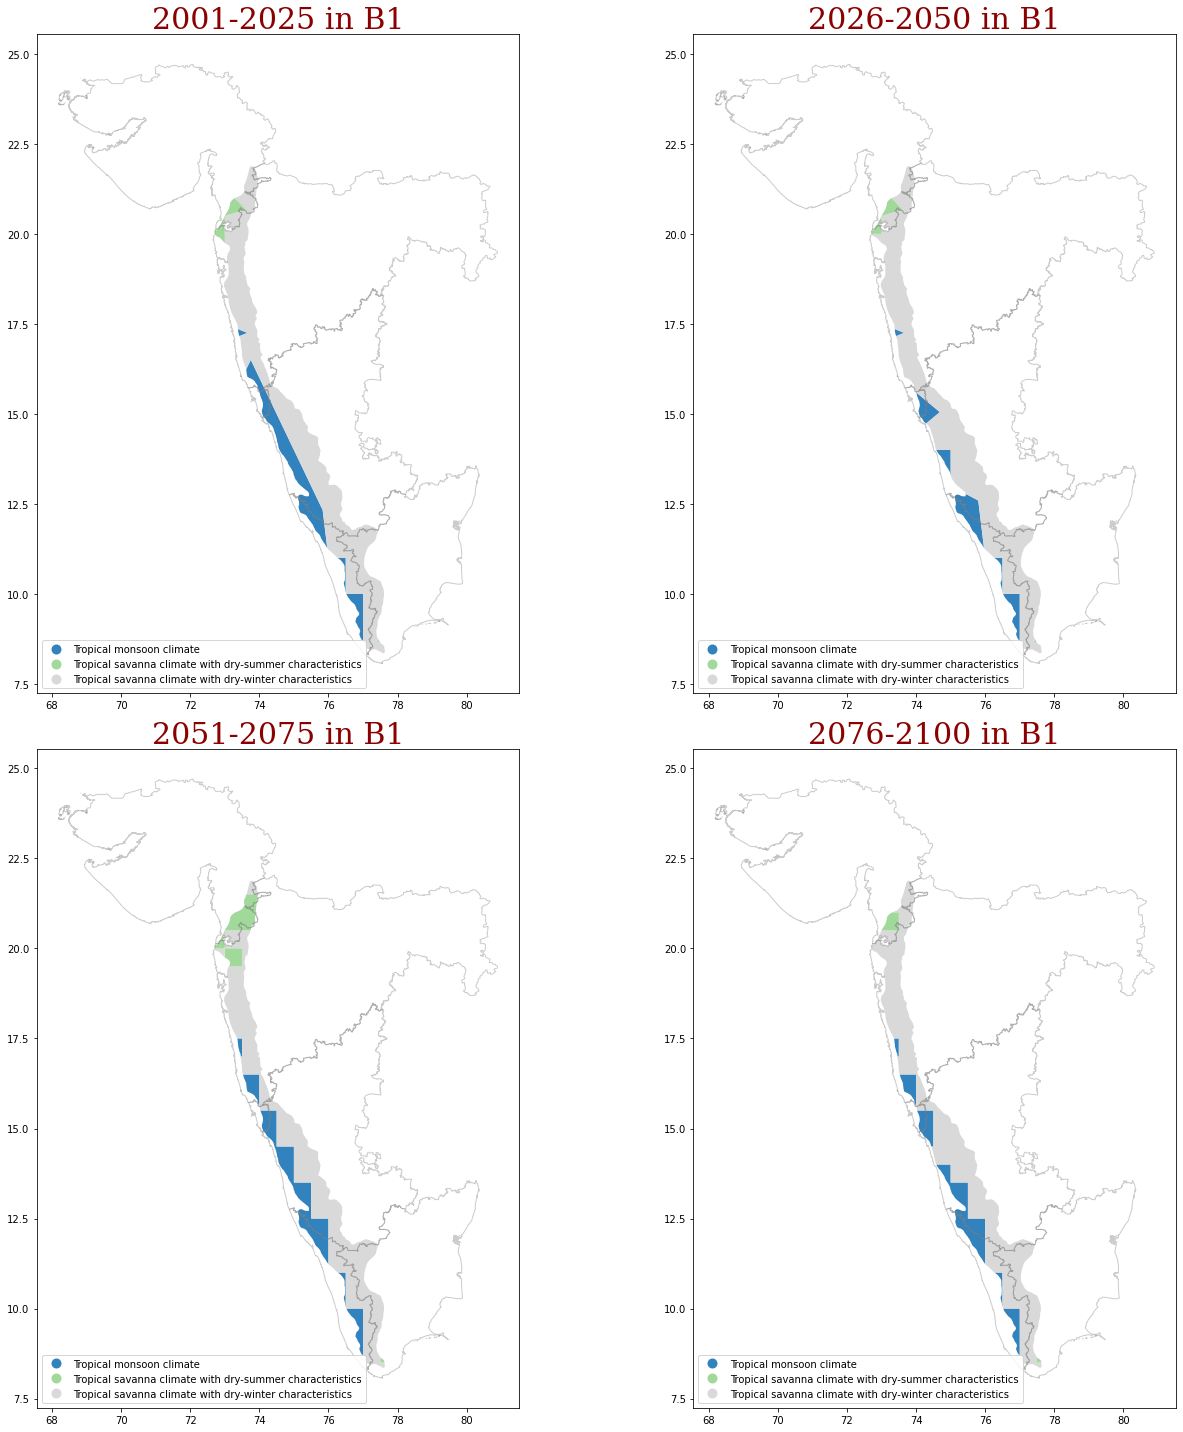

In [36]:
b1_region = []
for i in b1_world:
  name, df = i
  temp = df.clip(forest_boundary_df)
  temp = temp.reset_index(drop=True)
  b1_region.append((name, temp))

plot_shift_forest(b1_region, 'lower left')

**6.5 B2 Emissions Scenarios**, based on:
  > A heterogeneous world in which the emphasis is on local solutions to economic, social, and environmental sustainability. With less rapid, and more diverse technological, society looking for local solutions (rather than global).

* `b2_world` - **World - Shifts based B2 Emision Scenarios**
* `b2_region` - **Forest Region of Western Ghats - Shifts based B2 Emision Scenarios** 

In [37]:
# creating a new list for b2
b2_world = []
for i in koppen:
  name, df = i
  if name[-2:] == 'B2':
    b2_world.append((name, df))

# sorting the list by year
b2_world = sorted(b2_world, key = lambda x: int(x[0][0:3]))

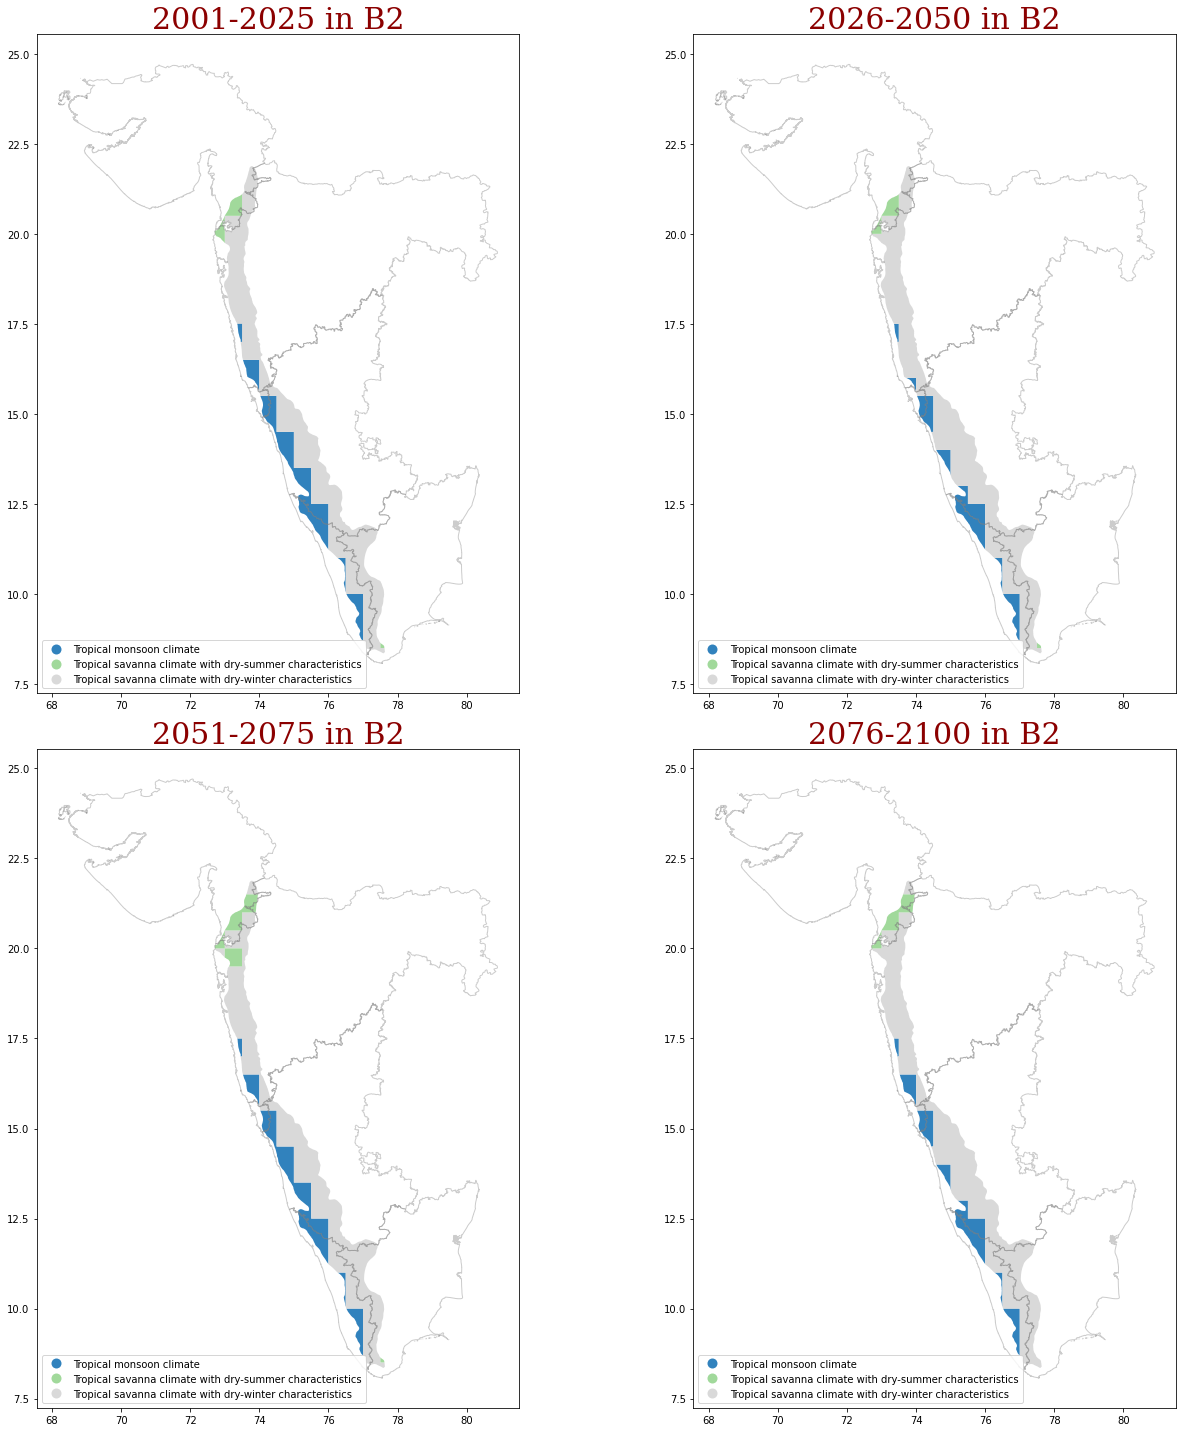

In [38]:
b2_region = []
for i in b2_world:
  name, df = i
  temp = df.clip(forest_boundary_df)
  temp = temp.reset_index(drop=True)
  b2_region.append((name, temp))

plot_shift_forest(b2_region, 'lower left')

 **6.6 Plotting bar plots to compare changes in area of diiferent climates**

In [39]:
climate_data = observations_region + a1f1_region + a2_region + b1_region + b2_region

In [40]:
# get area
def get_area(lista):  
  nueva_lista = []
  for i in lista:
    name, df = i   
    df['area_km2'] = df.geometry.area / 1e-6
    nueva_lista.append((name, df))
  return nueva_lista

In [56]:
# calculate the area and compare
region_area = get_area(climate_data)

# area calculation
region2 = pd.DataFrame(columns=['climate_shift','objectid', 'id', 'gridcode', 'shape_length', 'shape_area', 'geometry',
       'abb', 'koppen', 'area_km2'])
for i in region_area:
  name, df = i
  df['climate_shift'] = str(name)
  region2 = pd.concat([region2, df], ignore_index=True)
warnings.filterwarnings('ignore')

# subsetting the dataframe
region2 = region2[['climate_shift', 'abb', 'koppen', 'area_km2']].copy()

# groupby year
area_change_region = region2.groupby(['climate_shift', 'abb', 'koppen']).agg('sum').reset_index()

# dataframe for plotting
climates_abb_region = area_change_region.abb.value_counts().index.to_list()

warnings.filterwarnings('ignore')

In [42]:
#area_change_region.to_csv("area.csv")


In [43]:
#added zero values to the regions which dont appear in specific timelines
area_change_region = pd.read_csv("area.csv")
area_change_region = area_change_region.fillna(0.0)

In [44]:
dict = {'Am' : 'Tropical monsoon climate',
'As' : 'Tropical savanna climate with dry-summer characteristics',
'Aw' : 'Tropical savanna climate with dry-winter characteristics',
'BSh' : 'Hot semi-arid climate'}

types = ['Am : Tropical monsoon climate',
'As : Tropical savanna climate with dry-summer characteristics',
'Aw : Tropical savanna climate with dry-winter characteristics',
'BSh : Hot semi-arid climate']

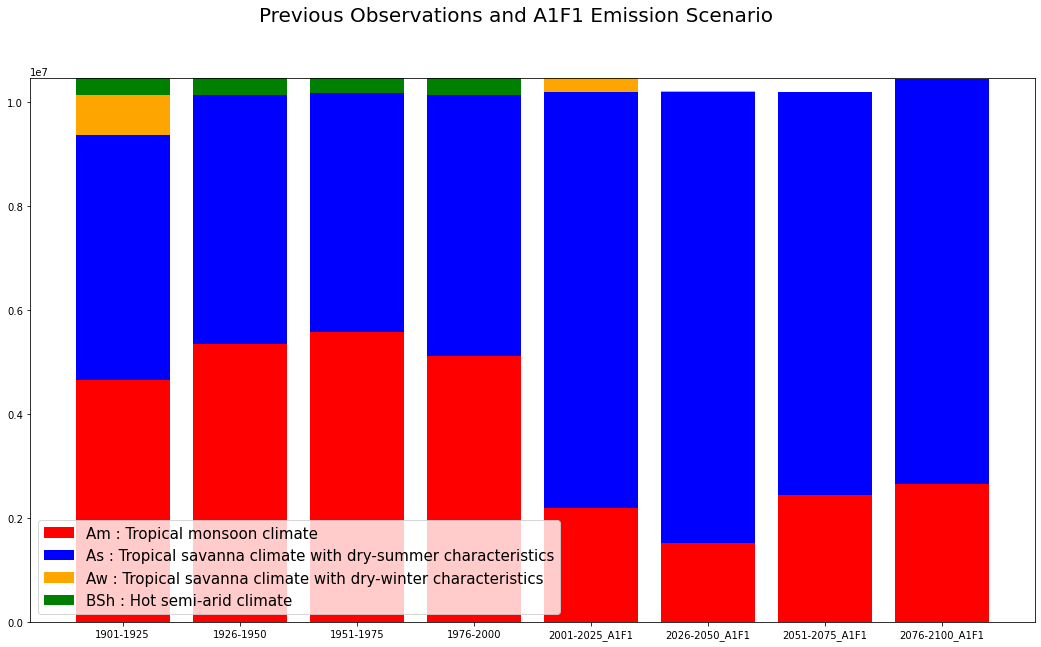

In [45]:
ob= ['1901-1925', '1926-1950', '1951-1975', '1976-2000']
af= ['2001-2025_A1F1', '2026-2050_A1F1', '2051-2075_A1F1', '2076-2100_A1F1']
a2= ['2001-2025_A2', '2026-2050_A2', '2051-2075_A2', '2076-2100_A2']
b1= ['2001-2025_B1', '2026-2050_B1', '2051-2075_B1', '2076-2100_B1']
b2= ['2001-2025_B2', '2026-2050_B2', '2051-2075_B2', '2076-2100_B2']
# create data
x = ob + af

col = ['area_km2','climate_shift']
y1 = area_change_region.loc[(area_change_region['abb'] == 'Am')][col]
y1 = y1[(y1['climate_shift'].isin(x))]
y1.set_index('climate_shift', inplace=True)

y2 = area_change_region.loc[(area_change_region['abb'] == 'Aw')][col]
y2 = y2[(y2['climate_shift'].isin(x))]
y2.set_index('climate_shift', inplace=True)

y3 = area_change_region.loc[(area_change_region['abb'] == 'As')][col]
y3 = y3[(y3['climate_shift'].isin(x))]
y3.set_index('climate_shift', inplace=True)

y4 = area_change_region.loc[(area_change_region['abb'] == 'BSh')][col]
y4 = y4[(y4['climate_shift'].isin(x))]
y4.set_index('climate_shift', inplace=True)

y1_y2 = y1.add(y2)
y1_y2_y3 = y1_y2.add(y3)

#plot bars in stack manner
f, ax = plt.subplots(figsize=(18,10))
plt.bar(x, y1['area_km2'], color='r')
plt.bar(x, y2['area_km2'], bottom=y1['area_km2'], color='b')
plt.bar(x, y3['area_km2'], bottom=y1_y2['area_km2'], color='orange')
plt.bar(x, y4['area_km2'], bottom=y1_y2_y3['area_km2'], color='g')
plt.legend(types, loc = 'best', prop={'size': 15})
plt.suptitle('Previous Observations and A1F1 Emission Scenario' , size =20)

plt.show()

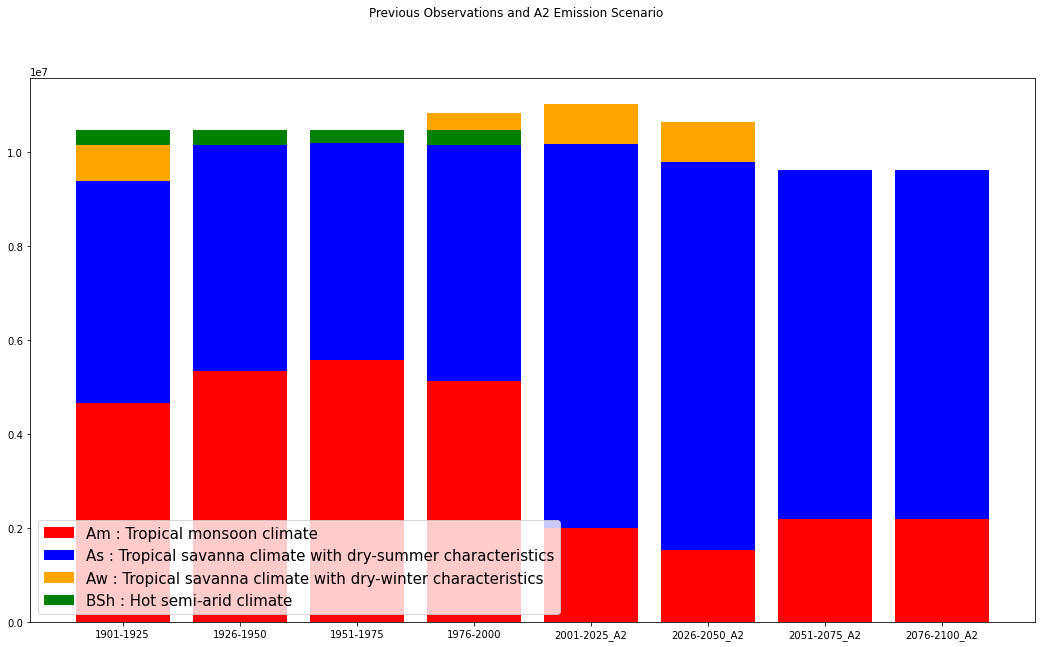

In [51]:
x = ob + a2

col = ['area_km2','climate_shift']
y1 = area_change_region.loc[(area_change_region['abb'] == 'Am')][col]
y1 = y1[(y1['climate_shift'].isin(x))]
y1.set_index('climate_shift', inplace=True)

y2 = area_change_region.loc[(area_change_region['abb'] == 'Aw')][col]
y2 = y2[(y2['climate_shift'].isin(x))]
y2.set_index('climate_shift', inplace=True)

y3 = area_change_region.loc[(area_change_region['abb'] == 'As')][col]
y3 = y3[(y3['climate_shift'].isin(x))]
y3.set_index('climate_shift', inplace=True)

y4 = area_change_region.loc[(area_change_region['abb'] == 'BSh')][col]
y4 = y4[(y4['climate_shift'].isin(x))]
y4.set_index('climate_shift', inplace=True)

y1_y2 = y1.add(y2)
y1_y2_y3 = y1_y2.add(y3)

#plot bars in stack manner
f, ax = plt.subplots(figsize=(18,10))
plt.bar(x, y1['area_km2'], color='r')
plt.bar(x, y2['area_km2'], bottom=y1['area_km2'], color='b')
plt.bar(x, y3['area_km2'], bottom=y1_y2['area_km2'], color='orange')
plt.bar(x, y4['area_km2'], bottom=y1_y2_y3['area_km2'], color='g')
plt.legend(types, loc = 'best', prop={'size': 15})
plt.suptitle('Previous Observations and A2 Emission Scenario', size = 20)

plt.show()

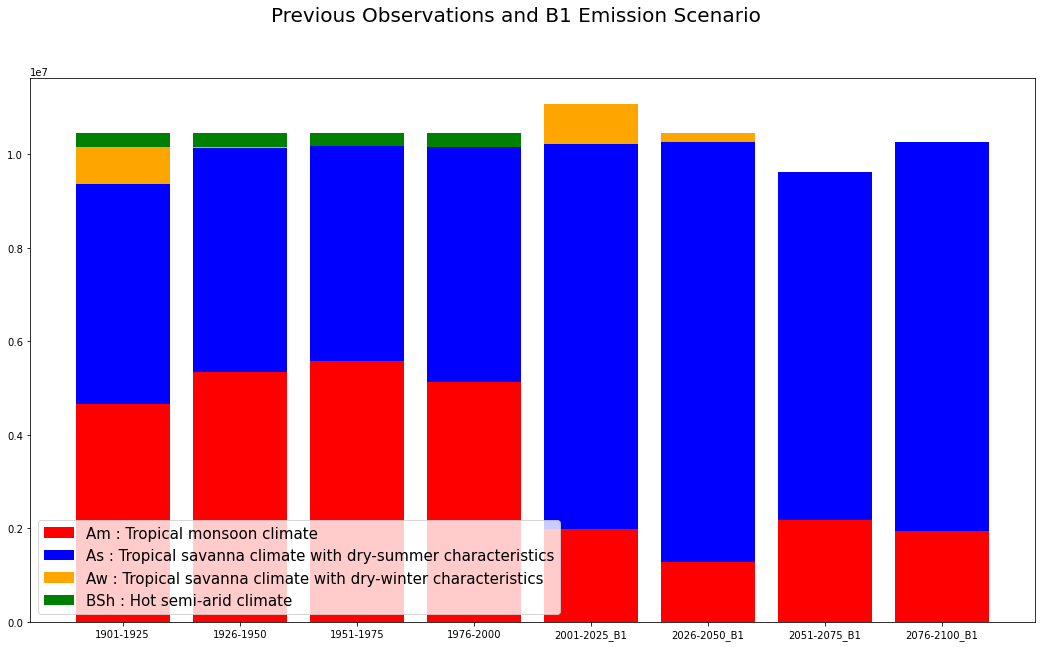

In [53]:
x = ob + b1

col = ['area_km2','climate_shift']
y1 = area_change_region.loc[(area_change_region['abb'] == 'Am')][col]
y1 = y1[(y1['climate_shift'].isin(x))]
y1.set_index('climate_shift', inplace=True)

y2 = area_change_region.loc[(area_change_region['abb'] == 'Aw')][col]
y2 = y2[(y2['climate_shift'].isin(x))]
y2.set_index('climate_shift', inplace=True)

y3 = area_change_region.loc[(area_change_region['abb'] == 'As')][col]
y3 = y3[(y3['climate_shift'].isin(x))]
y3.set_index('climate_shift', inplace=True)

y4 = area_change_region.loc[(area_change_region['abb'] == 'BSh')][col]
y4 = y4[(y4['climate_shift'].isin(x))]
y4.set_index('climate_shift', inplace=True)

y1_y2 = y1.add(y2)
y1_y2_y3 = y1_y2.add(y3)

#plot bars in stack manner
f, ax = plt.subplots(figsize=(18,10))
plt.bar(x, y1['area_km2'], color='r')
plt.bar(x, y2['area_km2'], bottom=y1['area_km2'], color='b')
plt.bar(x, y3['area_km2'], bottom=y1_y2['area_km2'], color='orange')
plt.bar(x, y4['area_km2'], bottom=y1_y2_y3['area_km2'], color='g')
plt.legend(types, loc = 'best', prop={'size': 15})
plt.suptitle('Previous Observations and B1 Emission Scenario', size = 20)

plt.show()

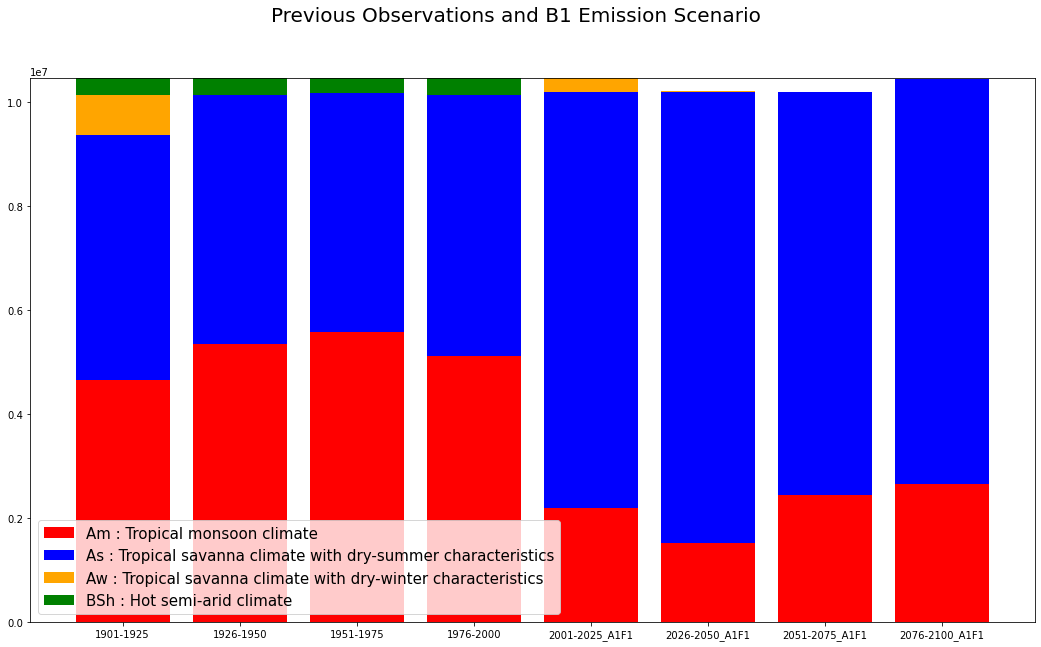

In [55]:
x = ob + af

col = ['area_km2','climate_shift']
y1 = area_change_region.loc[(area_change_region['abb'] == 'Am')][col]
y1 = y1[(y1['climate_shift'].isin(x))]
y1.set_index('climate_shift', inplace=True)

y2 = area_change_region.loc[(area_change_region['abb'] == 'Aw')][col]
y2 = y2[(y2['climate_shift'].isin(x))]
y2.set_index('climate_shift', inplace=True)

y3 = area_change_region.loc[(area_change_region['abb'] == 'As')][col]
y3 = y3[(y3['climate_shift'].isin(x))]
y3.set_index('climate_shift', inplace=True)

y4 = area_change_region.loc[(area_change_region['abb'] == 'BSh')][col]
y4 = y4[(y4['climate_shift'].isin(x))]
y4.set_index('climate_shift', inplace=True)

y1_y2 = y1.add(y2)
y1_y2_y3 = y1_y2.add(y3)

#plot bars in stack manner
f, ax = plt.subplots(figsize=(18,10))
plt.bar(x, y1['area_km2'], color='r')
plt.bar(x, y2['area_km2'], bottom=y1['area_km2'], color='b')
plt.bar(x, y3['area_km2'], bottom=y1_y2['area_km2'], color='orange')
plt.bar(x, y4['area_km2'], bottom=y1_y2_y3['area_km2'], color='g')
plt.legend(types, loc = 'best', prop={'size': 15})
plt.suptitle('Previous Observations and B1 Emission Scenario', size = 20)

plt.show()

From the above Stacked Bar plots we can easily compare how climate has changed over the past years and their future predictions based on different emmission scenarios

In [49]:
def shift_print(df, clima, region):
  ob= ['1901-1925', '1926-1950', '1951-1975', '1976-2000']
  af= ['2001-2025_A1F1', '2026-2050_A1F1', '2051-2075_A1F1', '2076-2100_A1F1']
  a2= ['2001-2025_A2', '2026-2050_A2', '2051-2075_A2', '2076-2100_A2']
  b1= ['2001-2025_B1', '2026-2050_B1', '2051-2075_B1', '2076-2100_B1']
  b2= ['2001-2025_B2', '2026-2050_B2', '2051-2075_B2', '2076-2100_B2']

  temp = df.loc[df.abb == clima].reset_index(drop=True)

  fig, ax = plt.subplots(1,4,figsize = (30, 8), facecolor='w', edgecolor='k')
  af = temp.loc[temp['climate_shift'].isin(ob + af)]
  sns.barplot(data= af, color='limegreen',  y = 'climate_shift', x = 'area_km2', ax=ax[0])
  ax[0].set_title('')
  a2 = temp.loc[temp['climate_shift'].isin(ob + a2)]
  sns.barplot(data= a2, color='limegreen', y = 'climate_shift', x = 'area_km2', ax=ax[1])
  ax[1].set_title('')
  b1 = temp.loc[temp['climate_shift'].isin(ob + b1)]
  sns.barplot(data= b1, color='limegreen', y = 'climate_shift', x = 'area_km2', ax=ax[2])
  ax[2].set_title('')
  b2 = temp.loc[temp['climate_shift'].isin(ob + b2)]
  sns.barplot(data= b2, color='limegreen', y = 'climate_shift', x = 'area_km2', ax=ax[3])
  ax[3].set_title('')

  fig.suptitle('Analysis for Climate: ' + str(clima) + ' in ' + str(region), fontsize=30)
  plt.tight_layout(rect=[0, 0.03, 1, 0.90])
  plt.show()

'Am'

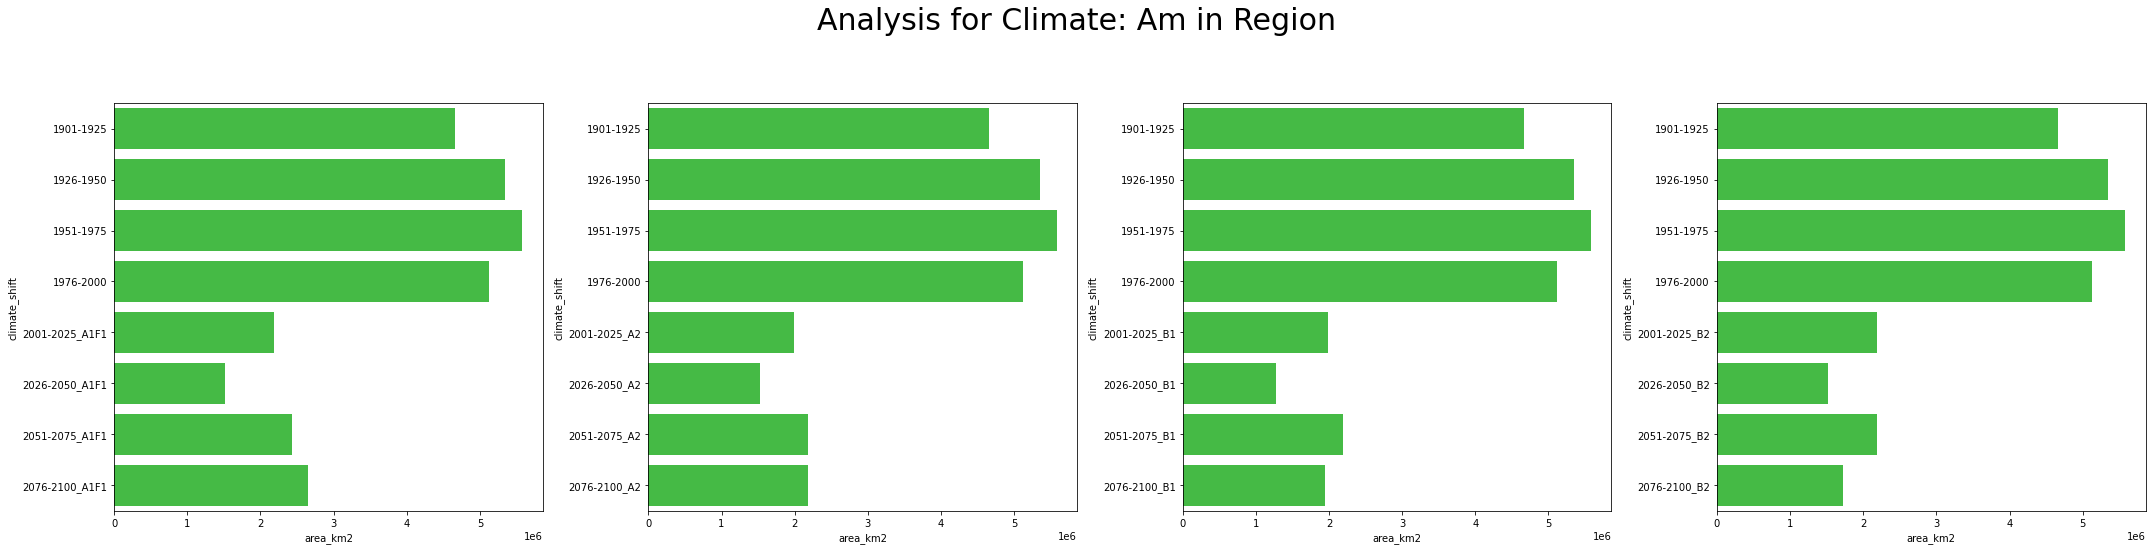

'Aw'

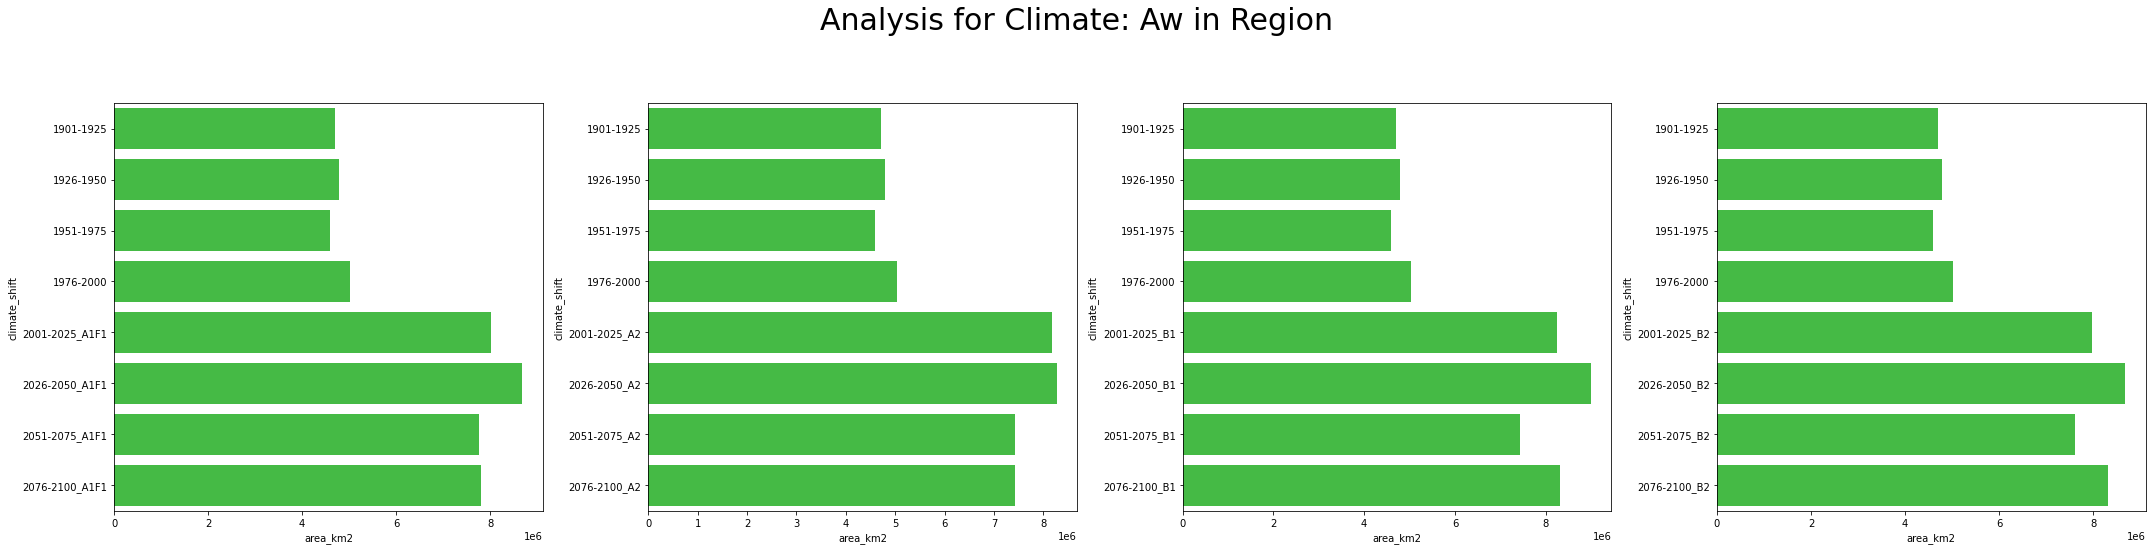

'As'

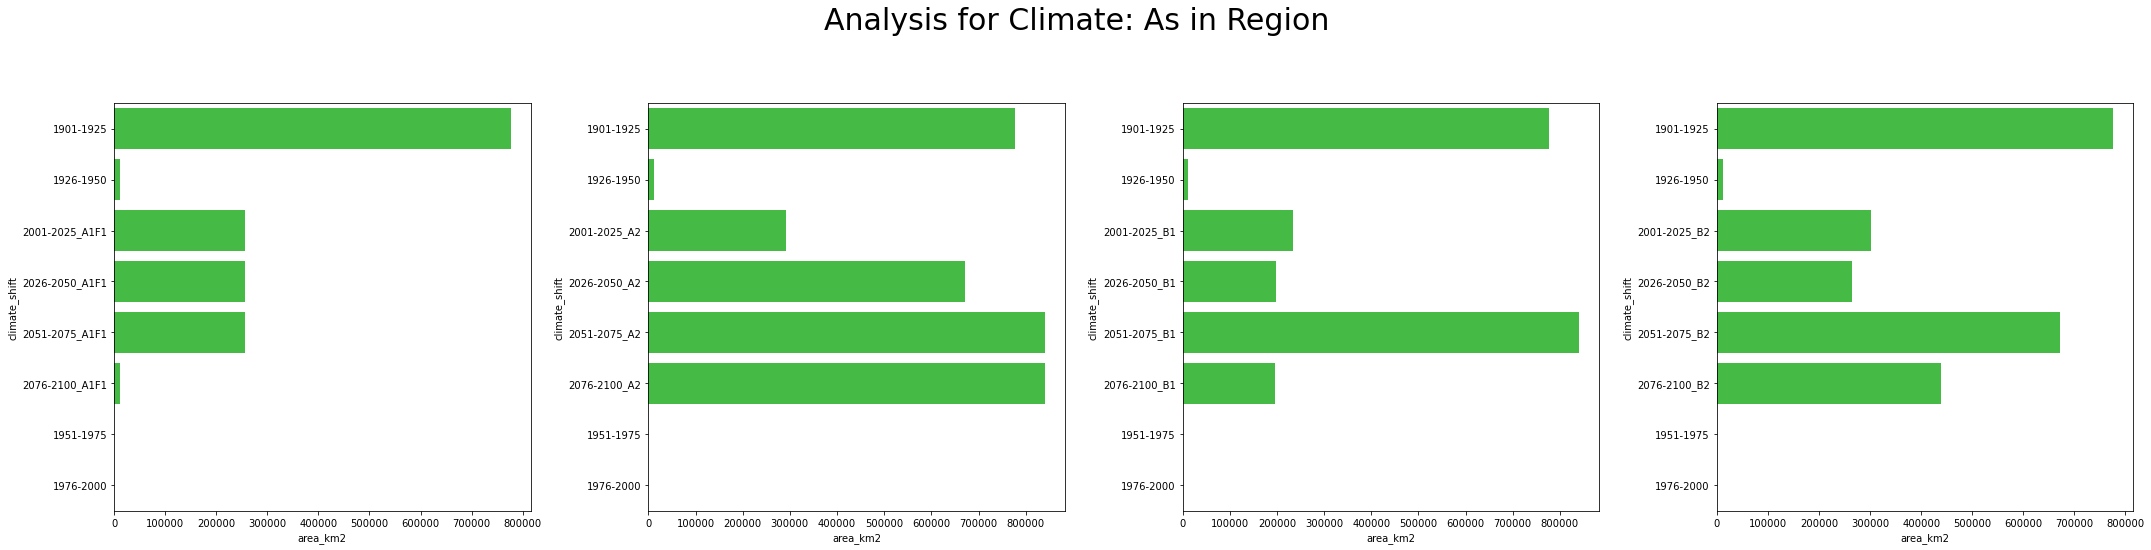

'BSh'

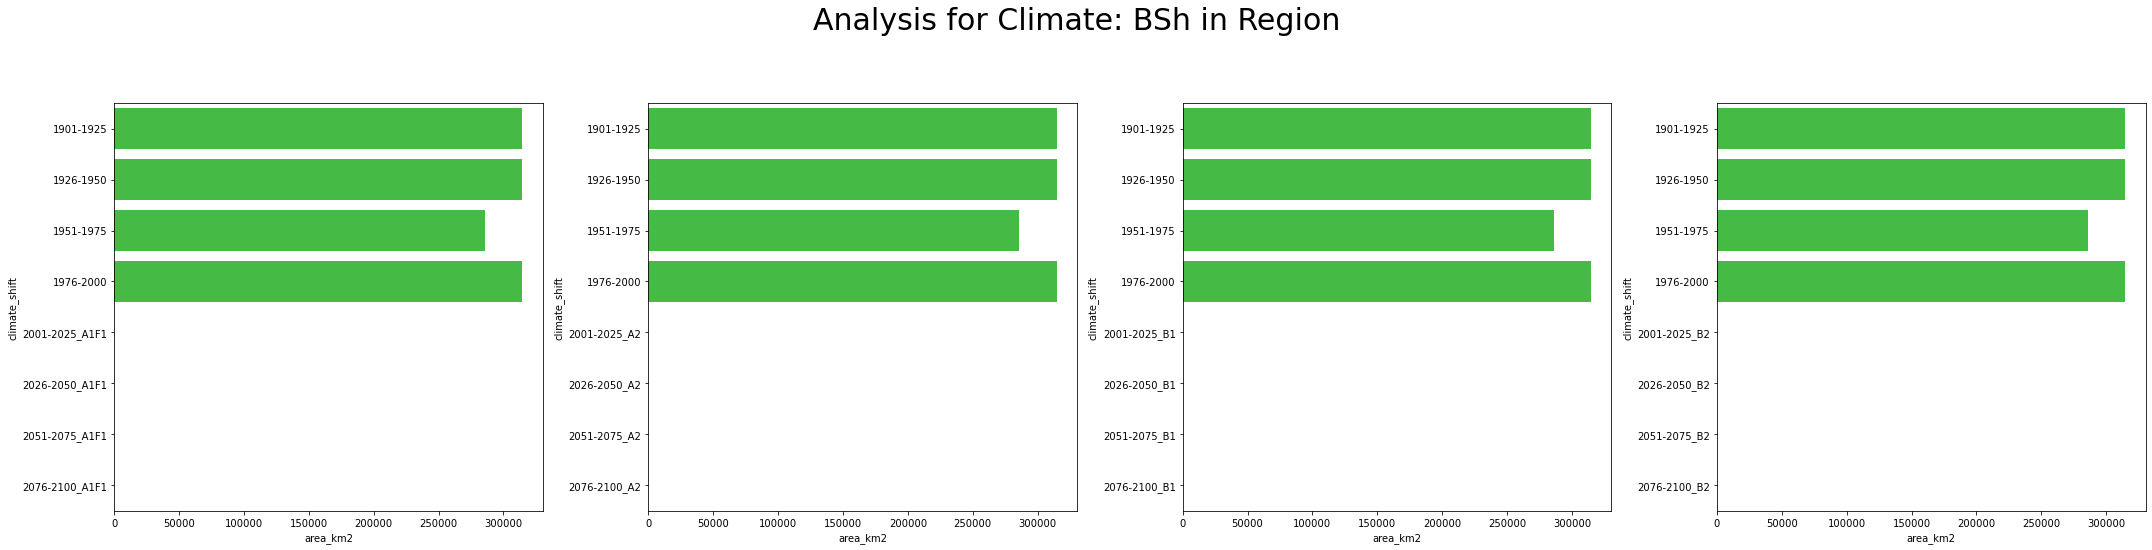

In [50]:
for i in climates_abb_region[:4]:
  display(i)
  shift_print(area_change_region, i, 'Region')
  print()

- 'Am' : 'Tropical monsoon climate'
- 'As' : 'Tropical savanna climate with dry-summer characteristics'
- 'Aw' : 'Tropical savanna climate with dry-winter characteristics 
- 'BSh' : 'Hot semi-arid climate'

These Barplots represent how the regions of **TROPICAL MONSOON CLIMATE and others** have changed over the years and in future years.
From the graphs above it is clear that TROPICAL MONSOON CLIMATE(Am) has reduced which will adversely affect the vegetations which require this specific type of climate